Use the Boston dataset (Click here to download the Boston dataset) and perform the following activities:

1.    Consider the column, ‘RM’, as predictor, and ‘MEDV’ as the target variable

2.    Visualize the association between the predictor and the target using scatter plot.

3.    Split the data into train and test datasets, in the ratio of 67:33.

4.    Build a Linear Regression model using training dataset, to predict the target variable.

5.    Observe the coefficient and intercept values for the model.

6.    Evaluate the model using mean squared error values and R-squared values on the training and the testing datasets.

In [133]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

In [134]:
data=pd.read_csv("boston_housing.csv")

In [135]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [136]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


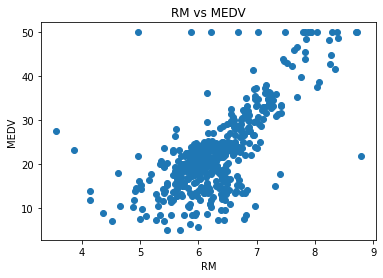

In [137]:
x='RM'
y='MEDV'
plt.scatter(data[x],data[y])
plt.xlabel(x)
plt.ylabel(y)
plt.title('RM vs MEDV')
plt.show()

In [138]:

target=data[y]
x_train,x_test,y_train,y_test=train_test_split(data[[x]],target,test_size=0.33)

In [139]:
x_train,y_train

(        RM
 488  5.454
 99   7.416
 105  5.851
 450  6.749
 255  5.876
 ..     ...
 103  6.137
 404  5.531
 502  6.120
 243  6.393
 461  6.376
 
 [339 rows x 1 columns],
 488    15.2
 99     33.2
 105    19.5
 450    13.4
 255    20.9
        ... 
 103    19.3
 404     8.5
 502    20.6
 243    23.7
 461    17.7
 Name: MEDV, Length: 339, dtype: float64)

In [140]:
x_test,y_test

(        RM
 231  7.412
 261  7.520
 55   7.249
 298  6.345
 280  7.820
 ..     ...
 405  5.683
 191  6.739
 223  6.618
 277  6.826
 153  5.709
 
 [167 rows x 1 columns],
 231    31.7
 261    43.1
 55     35.4
 298    22.5
 280    45.4
        ... 
 405     5.0
 191    30.5
 223    30.1
 277    33.1
 153    19.4
 Name: MEDV, Length: 167, dtype: float64)

## manual implementation

In [141]:
x = data[x]
y = data[y]
xiyi = x*y
n = len(data)
xmean = x.mean()
ymean = y.mean()
numerator = xiyi.sum() - n*xmean*ymean
denominator = (x**2).sum() - n*(xmean**2)
m = numerator/denominator
c = ymean - (m*xmean)
print('intercept : ',c,' coefficient : ',m)

intercept :  -34.670620776445816  coefficient :  9.102108981181456


## implementation using scikit

## using whole data

In [142]:
from sklearn.linear_model import LinearRegression

In [143]:
lin_reg=LinearRegression()
lin_reg.fit(data[['RM']],data['MEDV'])
lin_reg.score(data[['RM']],data['MEDV'])

0.48352545599133423

In [144]:
lin_reg.intercept_

-34.670620776438554

In [145]:
lin_reg.coef_

array([9.10210898])

## using data split into train and test

In [146]:
lin_reg=LinearRegression()
lin_reg.fit(x_train,y_train)
#coef and intercept values of model
print(lin_reg.intercept_,lin_reg.coef_)

-30.29531248004266 [8.43927436]


### mse and r_square on training dataset

In [147]:
from sklearn.metrics import mean_squared_error
y_train_pred=lin_reg.predict(x_train)
print("Mse using built-in",mean_squared_error(y_train,y_train_pred))
sse=sum((y_train-y_train_pred)**2)
print("MSE manually:",sse/len(y_train))

Mse using built-in 49.41680723333989
MSE manually: 49.416807233339846


In [148]:
y_train_mean=y_train.mean()
sst=sum((y_train-y_train_mean)**2)
ssr=sst-sse
r_sq_train=ssr/sst
print("r_square for training data manually:",r_sq_train)
print("r_square for training data using built in:",lin_reg.score(x_train,y_train))

r_square for training data manually: 0.43020794008783003
r_square for training data using built in: 0.4302079400878295


### mse and r_square on test dataset

In [149]:
y_test_pred=lin_reg.predict(x_test)
print("Mse using built-in",mean_squared_error(y_test,y_test_pred))
sse_test=sum((y_test-y_test_pred)**2)
print("MSE manually:",sse_test/len(y_test))

Mse using built-in 32.58293533320362
MSE manually: 32.58293533320363


In [151]:
y_test_mean=y_test.mean()
sst_test=sum((y_test-y_test_mean)**2)
ssr_test=sst_test-sse_test
r_sq_test=ssr_test/sst_test
print("r_square for test data manually:",r_sq_test)
print("r_square for test data using built in:",lin_reg.score(x_test,y_test))

r_square for test data manually: 0.5904289315381968
r_square for test data using built in: 0.5904289315381972
